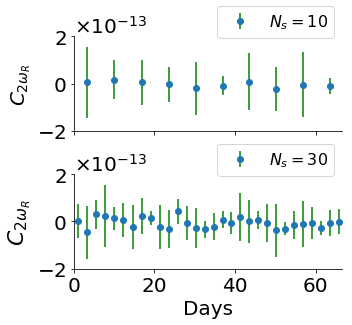

In [2]:
# This file reads the OLS_Sliced data and plot the result for the presentation
# data are the parameters generated by the OLS fitting function
# parameter is C_2w_R
# different number of slicing is compared, namely 10 and 30

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# read data
pathname = './Data/OLS_slicing/run8&9/'
filename = 'OLS_slicing_para_index2.txt'

dict = {}  # for storing data of 10 and 30 pieces of slices. Value and Std.

for pieces in [10, 30]:
    p_str = str(pieces)
    middle_path = p_str + 'Slices/'
    fullname = pathname + middle_path + filename
    dict[p_str] = pd.read_csv(fullname, index_col='Index')

# asign variable
day10 = dict['10']['day'].values
value10 = dict['10']['para'].values
std10 = dict['10']['std'].values
day30 = dict['30']['day'].values
value30 = dict['30']['para'].values
std30 = dict['30']['std'].values


# plotting
fontsize = 20

f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(5,4.5))

ax1.errorbar(day10, value10, yerr=std10, ecolor='g', fmt='o', label='$N_s = 10$')
ax1.set_xlim(left=0)  # starts from Day 0
ax1.set_ylim([-2e-13,2e-13])
ax1.set_ylabel('$C_{2\omega_R}$', fontsize=fontsize)  # use created ylabel dictionary for display
ax1.tick_params(labelsize=fontsize)
ax1.legend(fontsize=16, loc=4, bbox_to_anchor=(1, 0.9))
#ax1.axhline(0, linestyle='--',color='black')
ax1.spines['top'].set_visible(False)  # remove frame
ax1.spines['right'].set_visible(False)

# changing the format of the offset
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
t = ax1.yaxis.get_offset_text()
t.set_size(fontsize)

ax2.errorbar(day30, value30, yerr=std30, ecolor='g', fmt='o', label='$N_s = 30$')
ax2.set_xlabel('Days', fontsize=fontsize)
ax2.set_xlim(left=0)  # starts from Day 0
ax2.set_ylim([-2e-13,2e-13])
ax2.set_ylabel('$C_{2\omega_R}$', fontsize=fontsize+2)  # use created ylabel dictionary for display
ax2.tick_params(labelsize=fontsize)
ax2.legend(fontsize=16, loc=4, bbox_to_anchor=(1, 0.9))
#ax2.axhline(0, linestyle='--',color='black')
ax2.spines['top'].set_visible(False)  # remove frame
ax2.spines['right'].set_visible(False)

# changing the format of the offset
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
t = ax2.yaxis.get_offset_text()
t.set_size(fontsize)

f.tight_layout()

plt.savefig('Images/OLS_Slicing.png', fmt='png')
plt.savefig('Images/OLS_Slicing.eps', fmt='eps')

plt.show()

In [4]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

class FixedOrderFormatter(ScalarFormatter):
    """Formats axis ticks using scientific notation with a constant order of 
    magnitude"""
    def __init__(self, order_of_mag=0, useOffset=True, useMathText=True):
        self._order_of_mag = order_of_mag
        ScalarFormatter.__init__(self, useOffset=useOffset, 
                                 useMathText=useMathText)
    def _set_orderOfMagnitude(self, range):
        """Over-riding this to avoid having orderOfMagnitude reset elsewhere"""
        self.orderOfMagnitude = self._order_of_mag

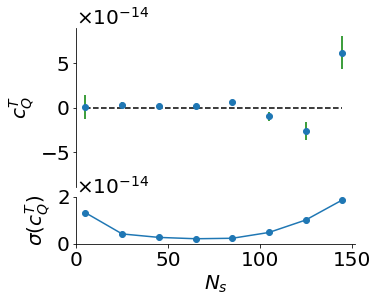

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter


filename = './Data/OLS_slicing_Optimization/run8&9/OLS_optimize_index0.txt'
data = pd.read_csv(filename, index_col='Index')
N = data['N_s'].values
value = data['co'].values
std = data['std'].values


f = plt.figure(figsize= (5,5))
ax1 = plt.subplot2grid((5, 4), (0, 0), colspan=4, rowspan=3)
ax2 = plt.subplot2grid((5, 4), (3, 0), colspan=4, rowspan=1)

ax1.errorbar(N, value, yerr=std, ecolor='g', fmt='o')
ax1.plot(N, [0]*len(N), '--', color='k')  # add a zero line
ax1.set_ylabel('$c_Q^T$', fontsize=20)
ax1.set_xlim(left=0)
ax1.set_ylim([-9e-14,9e-14])
ax1.tick_params(labelsize=20)
ax1.set_xticks([])
ax1.spines['top'].set_visible(False)  # remove frame
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.yaxis.set_major_formatter(FixedOrderFormatter(-14))
t = ax1.yaxis.get_offset_text()
t.set_size(20)



ax2.plot(N, std, 'o-')
ax2.set_ylim([0,2e-14])
ax2.set_xlim(left=0)
ax2.set_xlabel('$N_s$', fontsize=20)
ax2.set_ylabel('$\sigma(c_Q^T)$', fontsize=20)
ax2.spines['top'].set_visible(False)  # remove frame
ax2.spines['right'].set_visible(False)

# calculate the min position
y_min = np.min(std)
y_min_disp = str(round(y_min,17))
x_min_index = np.argmin(std)
x_min = N[x_min_index]

# add text
#extstr = 'Optimize:\n' + '(' + str(x_min) + ',' + str(y_min_disp) + ')'
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax2.text(0.45, 0.95, textstr, transform=ax2.transAxes, fontsize=fs,
#        verticalalignment='top', bbox=props)

ax2.tick_params(labelsize=20)
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
t = ax2.yaxis.get_offset_text()
t.set_size(20)



# save figure
plt.savefig('Images/OLS_slice_opti.png', fmt='png', bbox_inches='tight')
plt.savefig('Images/OLS_slice_opti.eps', fmt='eps', bbox_inches='tight')

plt.show()
